In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
import numpy as np
from statistics import mean

In [2]:
dfSephora = pd.read_csv(r'/Users/alison/Desktop/Sephora.csv')
dfSephora

,Brand Name,Owner,Female,POC,Year Founded,Product Types,Number of Products,Number of Clean,Percent Clean
0,Acqua di Parma,Laura Burdese,True,False,1916,"Fragrance, Bath & Body",37,0,0.00
1,adwoa beauty,Julian Addo,True,True,2017,Hair,14,13,0.93
2,AERIN,Aerin Lauder,True,False,2012,Fragrance,19,0,0.00
3,Algenist,Harrison Dillon and Jonathan Wolfson,False,False,2011,"Skincare,Bath & Body, Makeup",38,0,0.00
4,Alpha-H,Michelle Doherty,True,False,1995,Skincare,10,0,0.00
...,...,...,...,...,...,...,...,...,...
300,Yves Saint Laurent,Yves Saint Laurent and Pierre Bergé,False,False,1961,"Makeup, Skincare, Fragrance, Bath & Body",69,0,0.00
301,19-69﻿NEW,Johan Bergelin,False,False,2017,Fragrance,14,0,0.00
302,54 Thrones,Christina Funke Tegbe,True,True,2016,Bath & Body,3,3,1.00
303,The 7 Virtues,Barb Stegemann,True,False,2010,"Fragrance, Bath & Body",22,21,0.95


                      Female       POC  Year Founded  Number of Products  \
Female              1.000000  0.141335      0.346014           -0.074774   
POC                 0.141335  1.000000      0.156449           -0.119221   
Year Founded        0.346014  0.156449      1.000000           -0.211425   
Number of Products -0.074774 -0.119221     -0.211425            1.000000   
Number of Clean     0.119163 -0.046275      0.055164            0.243229   
Percent Clean       0.180593  0.050739      0.196986           -0.212382   

                    Number of Clean  Percent Clean  
Female                     0.119163       0.180593  
POC                       -0.046275       0.050739  
Year Founded               0.055164       0.196986  
Number of Products         0.243229      -0.212382  
Number of Clean            1.000000       0.622169  
Percent Clean              0.622169       1.000000  


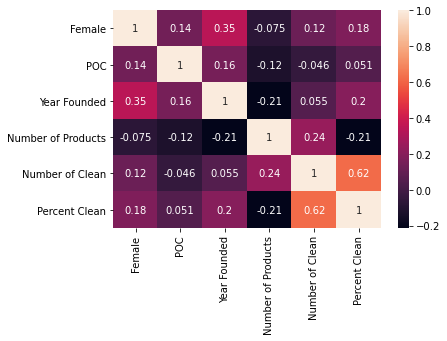

In [3]:
corrMatrix = dfSephora.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
femCnt = 0
pocCnt = 0
femPOCcnt = 0

for i in dfSephora.index:
    if dfSephora['Female'][i] == True:
        femCnt += 1
    if dfSephora['POC'][i] == True:
        pocCnt += 1
    if dfSephora['Female'][i] == True and dfSephora['POC'][i] == True:
        femPOCcnt += 1

print('Fem Count:', femCnt)
print('POC Count:', pocCnt)
print('POC and Fem:', femPOCcnt)

Fem Count: 193
POC Count: 67
POC and Fem: 51


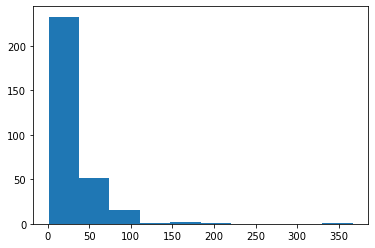

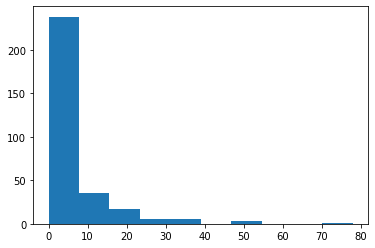

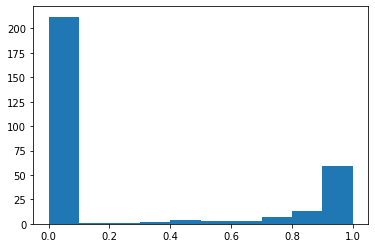

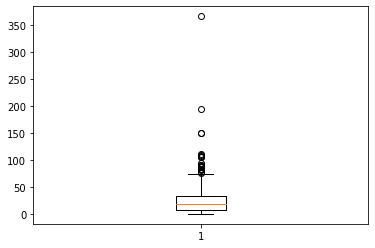

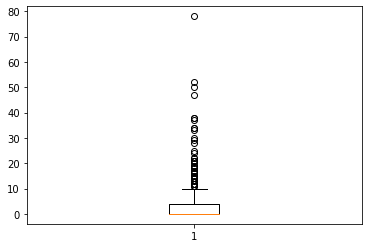

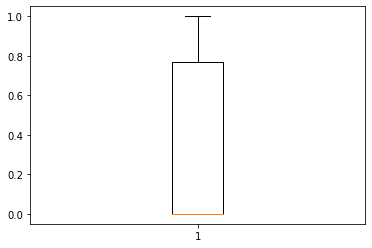

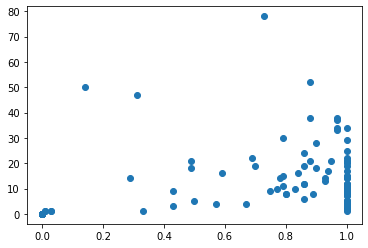

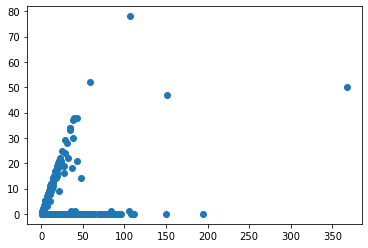

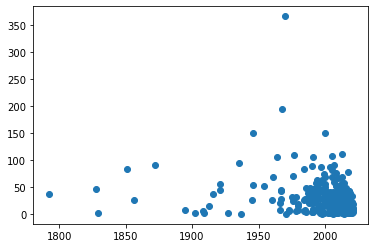

In [5]:
plt.hist(dfSephora['Number of Products'])
plt.show()

plt.hist(dfSephora['Number of Clean'])
plt.show()

plt.hist(dfSephora['Percent Clean'])
plt.show()

plt.boxplot(dfSephora['Number of Products'])
plt.show()

plt.boxplot(dfSephora['Number of Clean'])
plt.show()

plt.boxplot(dfSephora['Percent Clean'])
plt.show()

plt.scatter(dfSephora['Percent Clean'], dfSephora['Number of Clean'])
plt.show()

plt.scatter(dfSephora['Number of Products'], dfSephora['Number of Clean'])
plt.show()

plt.scatter(dfSephora['Year Founded'], dfSephora['Number of Products'])
plt.show()


Estimated coefficients:
b_0 = 2.505433716668233            
b_1 = 0.0720303586501043


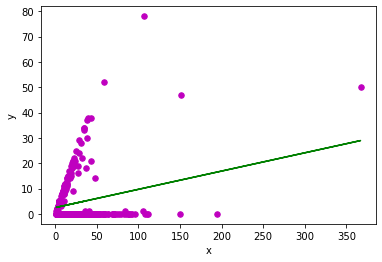


0.059160497208358406



In [6]:
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

x = dfSephora['Number of Products']
y = dfSephora['Number of Clean']
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
# plotting regression line
plot_regression_line(x, y, b)
print()
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)
print()

In [7]:
productDict = {}
for i in dfSephora.index:
    product = [x.strip() for x in dfSephora['Product Types'][i].split(',')]
    #product = dfSephora['Product Types'][i].split(',')
    #print(product)
    for item in product:
        if item in productDict:
            productDict[item] +=1
        else:
            productDict[item] =1

print(productDict)

{'Fragrance': 76, 'Bath & Body': 140, 'Hair': 74, 'Skincare': 186, 'Makeup': 142, 'Tools & Brushes': 80}


In [8]:
print('Mean number of products:', round(mean(dfSephora['Number of Products']),2))
print('Mean number of clean products:', round(mean(dfSephora['Number of Clean']),2))
print('Mean percent of clean products:', round(mean(dfSephora['Percent Clean']),2))
print('Mean of Year Founded:', round(mean(dfSephora['Year Founded']),2))

Mean number of products: 27.94
Mean number of clean products: 4.52
Mean percent of clean products: 0.27
Mean of Year Founded: 1998.39


In [9]:
oneOwner = 0
twoOwners = 0
threeOwners = 0
fourOwners = 0
for i in dfSephora.index:
	owner = dfSephora['Owner'][i]
	if 'and' in owner and ',' in owner:
		commasCnt = owner.count(",")
		if commasCnt == 2:
			threeOwners +=1
		elif commasCnt == 3:
			fourOwners +=1
	elif 'and' in owner:
		twoOwners += 1
	else:
		oneOwner += 1

print()
print('Number of 1 owner:', oneOwner)
print('Number of 2 owners:', twoOwners)
print('Number of 3 owners:', threeOwners)
print('Number of 4 owners:', fourOwners)


Number of 1 owner: 234
Number of 2 owners: 64
Number of 3 owners: 4
Number of 4 owners: 2


In [10]:
cleanList = []

for i in dfSephora.index:
    if dfSephora['Number of Clean'][i] > 0:
        cleanList.append(True)
    else:
        cleanList.append(False)

dfSephora['Clean'] = cleanList
dfSephora

,Brand Name,Owner,Female,POC,Year Founded,Product Types,Number of Products,Number of Clean,Percent Clean,Clean
0,Acqua di Parma,Laura Burdese,True,False,1916,"Fragrance, Bath & Body",37,0,0.00,False
1,adwoa beauty,Julian Addo,True,True,2017,Hair,14,13,0.93,True
2,AERIN,Aerin Lauder,True,False,2012,Fragrance,19,0,0.00,False
3,Algenist,Harrison Dillon and Jonathan Wolfson,False,False,2011,"Skincare,Bath & Body, Makeup",38,0,0.00,False
4,Alpha-H,Michelle Doherty,True,False,1995,Skincare,10,0,0.00,False
...,...,...,...,...,...,...,...,...,...,...
300,Yves Saint Laurent,Yves Saint Laurent and Pierre Bergé,False,False,1961,"Makeup, Skincare, Fragrance, Bath & Body",69,0,0.00,False
301,19-69﻿NEW,Johan Bergelin,False,False,2017,Fragrance,14,0,0.00,False
302,54 Thrones,Christina Funke Tegbe,True,True,2016,Bath & Body,3,3,1.00,True
303,The 7 Virtues,Barb Stegemann,True,False,2010,"Fragrance, Bath & Body",22,21,0.95,True


                      Female       POC  Year Founded  Number of Products  \
Female              1.000000  0.141335      0.346014           -0.074774   
POC                 0.141335  1.000000      0.156449           -0.119221   
Year Founded        0.346014  0.156449      1.000000           -0.211425   
Number of Products -0.074774 -0.119221     -0.211425            1.000000   
Number of Clean     0.119163 -0.046275      0.055164            0.243229   
Percent Clean       0.180593  0.050739      0.196986           -0.212382   
Clean               0.140493  0.028768      0.081528           -0.087248   

                    Number of Clean  Percent Clean     Clean  
Female                     0.119163       0.180593  0.140493  
POC                       -0.046275       0.050739  0.028768  
Year Founded               0.055164       0.196986  0.081528  
Number of Products         0.243229      -0.212382 -0.087248  
Number of Clean            1.000000       0.622169  0.669930  
Percent Clean

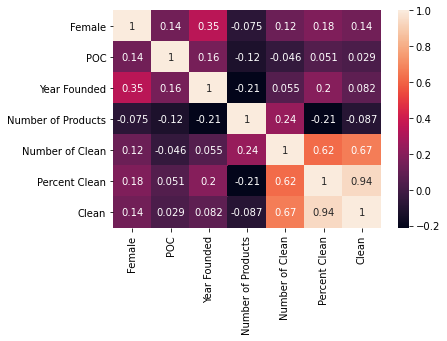

In [11]:
corrMatrix = dfSephora.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
cntClean = 0

for i in cleanList:
    if i == True:
        cntClean +=1
        
print(cntClean)
print(304 - cntClean)

97
207


In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['Female', 'POC', 'Year Founded', 'Number of Products', 'Clean']
X = dfSephora[feature_cols] # Features
y = dfSephora.Clean # Target variable


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


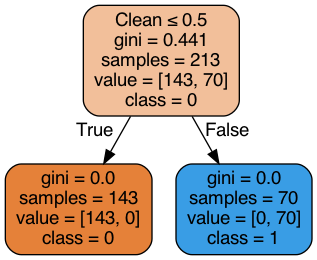

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Estimated coefficients:
b_0 = 0.35207751100611845            
b_1 = -0.0012184511683719932


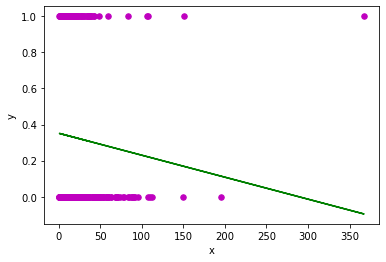


0.0076122398553787425



In [46]:
y = dfSephora['Clean']
x = dfSephora['Number of Products']
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
# plotting regression line
plot_regression_line(x, y, b)
print()
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)
print()